In [1]:
from utils.libs import *

In [2]:
def show_scattered_data(bpp_bsln, psnr_bsln, jpeg_df, baseline_df, siren_agp_df, siren_qatrlq_df, axes = None):
    x = 'bpp'; y = "psnr"
    flag_show_graphics = False
    if axes is None:
        flag_show_graphics = True
        fig, axes  = plt.subplots(1, 1, figsize = (20, 10))
        

    colors = sns.color_palette()

    sns.scatterplot(data = baseline_df, x=f"{x}", y=f"{y}",
                label = 'Baseline'.upper(), marker = 'x', color = colors[0],
                ax = axes)
    sns.scatterplot(data = siren_qatrlq_df, x=f"{x}", y=f"{y}",
                label = 'QATRLQ'.upper(), marker = 'o', color = colors[1],
                ax = axes)
    sns.scatterplot(data = siren_agp_df, x=f"{x}", y=f"{y}",
                label = 'Agp'.upper(), marker = 'd', s=100, color = colors[2],
                ax = axes)
    sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}",
                label = 'jpeg'.upper(), marker = '+', s=150, color = colors[4],
                ax = axes)
    axes.scatter(bpp_bsln, psnr_bsln, label = 'fixed-baseline'.upper(), marker = '*', color = colors[3], s=200)

    data = (baseline_df[y].values)
    ymin, ymax = 0, np.max(data)
    axes.vlines(x = 8.00403, ymin = ymin, ymax = ymax, 
           color='k', linestyle='--',
           label = 'v-line:BPP(Image)=8.00403')

    data = (baseline_df[x].values)
    xmin, xmax = 0, np.max(data)
    axes.hlines(y = psnr_bsln, xmin = 0, xmax = xmax, 
           color='k', linestyle='--',
           label = f'h-line:Baseline(Psnr=~{psnr_bsln:.2f}db,Bpp={bpp_bsln:.2f})')
    
    if flag_show_graphics:
        plt.legend()
        plt.show()
    else:
        axes.legend()
    pass

In [3]:
def show_paired_graphics(cmprs_df, bpp_bsln, psnr_bsln, n_hf_bsln, n_hl_bsln, init_from, savefig_flag = False):
    fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
    
    fig.suptitle(
        f"Compressed Baseline (n_hf={int(n_hf_bsln)}, n_hl={int(n_hl_bsln)}, bpp=~{bpp_bsln:.2f}, psnr=~{psnr_bsln:.2f}db)",\
        fontsize=25, # fontsize='large'
    )

    baseline_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Baseline".upper()]
    siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper()) & (cmprs_df['init-from'] == f"{init_from}")]
    siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
    jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]
    
    show_scattered_data(bpp_bsln, psnr_bsln,\
        jpeg_df, baseline_df, siren_agp_df, siren_qatrlq_df, axes=axes[0])

    baseline_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "Baseline".upper()) & (cmprs_df["psnr"] <= 50) & (cmprs_df["bpp"] <= 12)]
    siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper()) & (cmprs_df['init-from'] == f"{init_from}")]
    siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
    jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]
    
    show_scattered_data(bpp_bsln, psnr_bsln,\
        jpeg_df, baseline_df, siren_agp_df, siren_qatrlq_df, axes=axes[1])
    
    # plt.legend()
    
    if savefig_flag:
        # bpp_bsln, psnr_bsln, n_hf_bsln, n_hl_bsln
        graphics_name = f"compressed_baseline_nhf{n_hf_bsln}_nhl{n_hl_bsln}_bpp{bpp_bsln:.2f}_psnr{psnr_bsln:.2f}.png"
        plt.savefig(f"{graphics_name}")
        pass
    plt.show()
    return fig, axes

In [4]:
baseline_data = ['2020.11.29-231149','-',20995*32/8,100.,49.16,20995*32/(256*256), (256*256*8)/(20995*32), 4.86e-5,9.96e-1,'Baseline-n_hf64-n_hl5', 'BASELINE']
columns = 'date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2'.split(",")
baseline_data_df = pd.DataFrame([baseline_data], columns = columns)
baseline_data_df

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,2020.11.29-231149,-,83980.0,100.0,49.16,10.251465,0.780376,0.000049,0.996,Baseline-n_hf64-n_hl5,BASELINE


In [5]:
uniform_csv_dir = 'uniform_csv_files'
cmprs_df_csv_path = os.path.join(f"{uniform_csv_dir}", "cmprs_df.csv")

cmprs_df = pd.read_csv(cmprs_df_csv_path)
if "Unnamed: 0" in cmprs_df.columns:
    cmprs_df = cmprs_df.drop(["Unnamed: 0"], axis = 1)
cmprs_df.head(5)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,1603478755-305517,-,229204.0,100.0,58.145780,27.979004,0.138523,0.000006,0.998769,Baseline:hf=75:hl=10,BASELINE
1,1603478755-305517,-,229204.0,100.0,56.492704,27.979004,0.138523,0.000009,0.998202,Baseline:hf=75:hl=10,BASELINE
2,1603478755-305517,-,229204.0,100.0,58.214385,27.979004,0.138523,0.000006,0.999085,Baseline:hf=75:hl=10,BASELINE
3,1603478755-305517,-,252004.0,100.0,53.486111,30.762207,0.125990,0.000018,0.997542,Baseline:hf=75:hl=11,BASELINE
4,1603478755-305517,-,252004.0,100.0,58.401365,30.762207,0.125990,0.000005,0.999003,Baseline:hf=75:hl=11,BASELINE


In [6]:
qat_models_date = set(cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper())]['cmprss-class'].values)
pprint(qat_models_date)

{'AGP+QATRLQ:AS:NNPCW',
 'AGP+QATRLQ:AS:PCW',
 'AGP+QATRLQ:AU:NNPCW',
 'AGP+QATRLQ:AU:PCW',
 'AGP+QATRLQ:S:NNPCW',
 'AGP+QATRLQ:S:PCW'}


In [7]:
agp_models_date = set(cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper())]['init-from'].values)
pprint(agp_models_date)

{'2020.12.11-171610',
 '2020.12.12-190415',
 '2020.12.13-232457',
 '2020.12.14-174343'}


In [8]:
agp_models_date = set(cmprs_df[(cmprs_df["cmprss-class-2"] == "AGP".upper())]['date'].values)
pprint(agp_models_date)

{'2020.12.07-045630',
 '2020.12.08-191157',
 '2020.12.09-085652',
 '2020.12.10-044629',
 '2020.12.11-171610',
 '2020.12.12-190415',
 '2020.12.13-232457',
 '2020.12.14-102807',
 '2020.12.14-174343',
 '2020.12.15-173411'}


In [9]:
baseline_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Baseline".upper()]
siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper()) & (cmprs_df['init-from'] == "2020.12.12-190415")]
siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]

In [10]:
siren_qatrlq_df.describe()

,size(byte),footprint(%),psnr,bpp,CR,mse,ssim
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,14522.956522,17.293351,25.070875,1.772822,4.512981,0.084585,0.669274
std,139.013890,0.165532,8.943960,0.016969,0.043852,0.136812,0.310191
min,14203.000000,16.912360,11.108531,1.733765,4.478644,0.001484,0.163968
25%,14495.000000,17.260062,18.752995,1.769409,4.487538,0.003183,0.479318
50%,14588.000000,17.370803,26.619091,1.780762,4.492460,0.008713,0.793298
75%,14604.000000,17.389855,31.596648,1.782715,4.521348,0.159411,0.874421
max,14633.000000,17.424387,34.315303,1.786255,4.614236,0.309889,0.921473


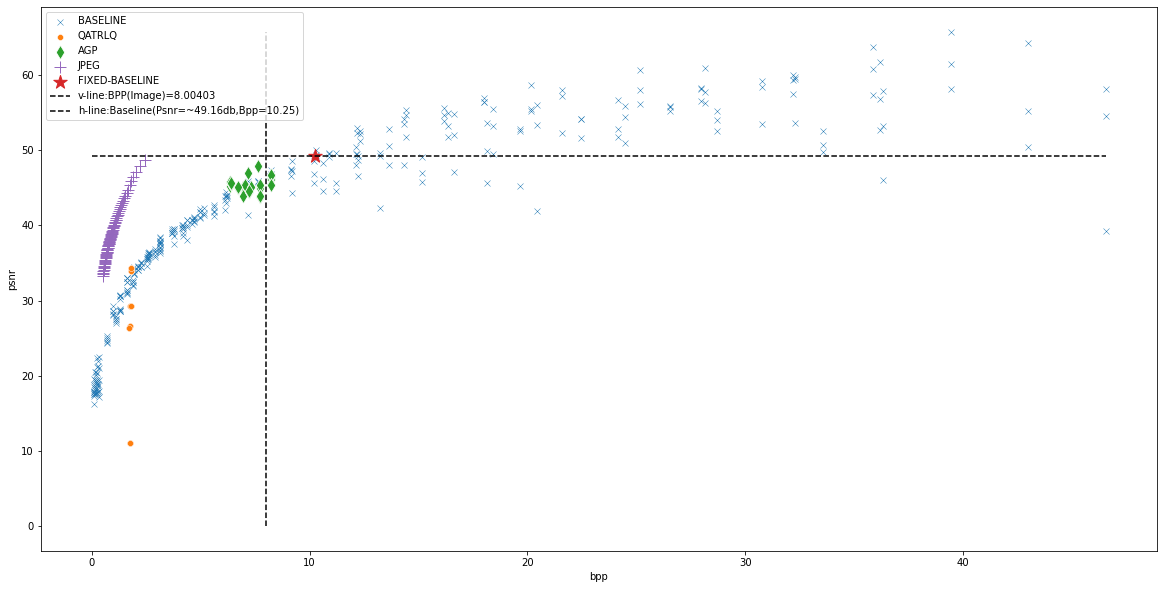

In [11]:
bpp_baseline, psnr_baseline = 10.25, 49.16
show_scattered_data(bpp_baseline, psnr_baseline,\
    jpeg_df, baseline_df, siren_agp_df, siren_qatrlq_df)

In [12]:
baseline_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "Baseline".upper()) & (cmprs_df["psnr"] <= 50) & (cmprs_df["bpp"] <= 12)]
siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper()) & (cmprs_df['init-from'] == "2020.12.12-190415")]
siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]

In [13]:
siren_qatrlq_df.describe()

,size(byte),footprint(%),psnr,bpp,CR,mse,ssim
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,14522.956522,17.293351,25.070875,1.772822,4.512981,0.084585,0.669274
std,139.013890,0.165532,8.943960,0.016969,0.043852,0.136812,0.310191
min,14203.000000,16.912360,11.108531,1.733765,4.478644,0.001484,0.163968
25%,14495.000000,17.260062,18.752995,1.769409,4.487538,0.003183,0.479318
50%,14588.000000,17.370803,26.619091,1.780762,4.492460,0.008713,0.793298
75%,14604.000000,17.389855,31.596648,1.782715,4.521348,0.159411,0.874421
max,14633.000000,17.424387,34.315303,1.786255,4.614236,0.309889,0.921473


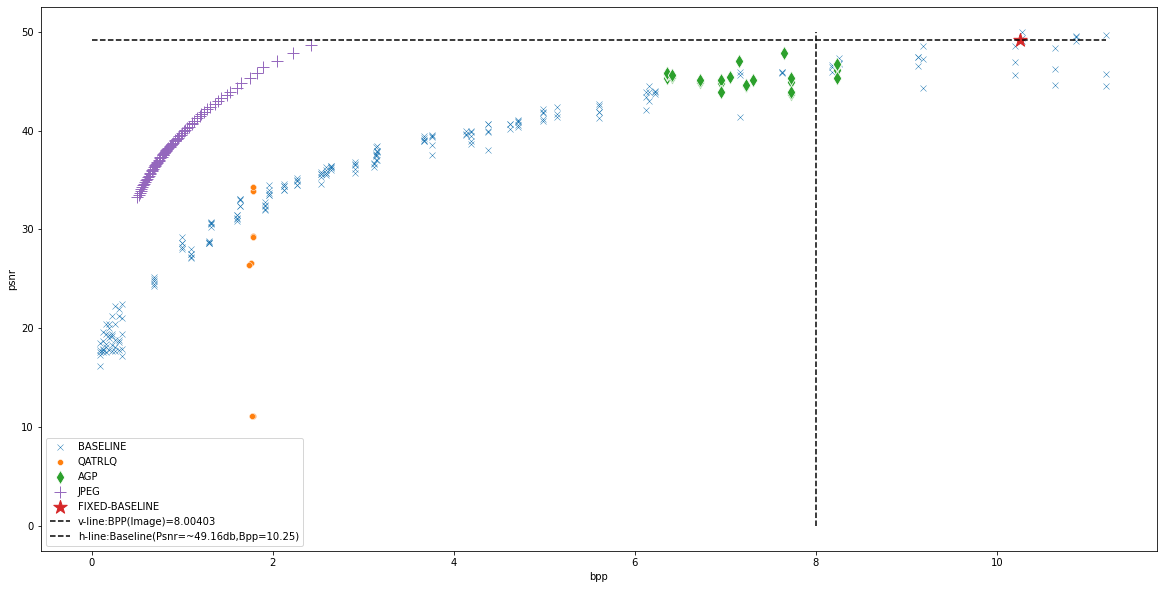

In [14]:
bpp_baseline, psnr_baseline = 10.25, 49.16
show_scattered_data(bpp_baseline, psnr_baseline,\
    jpeg_df, baseline_df, siren_agp_df, siren_qatrlq_df)

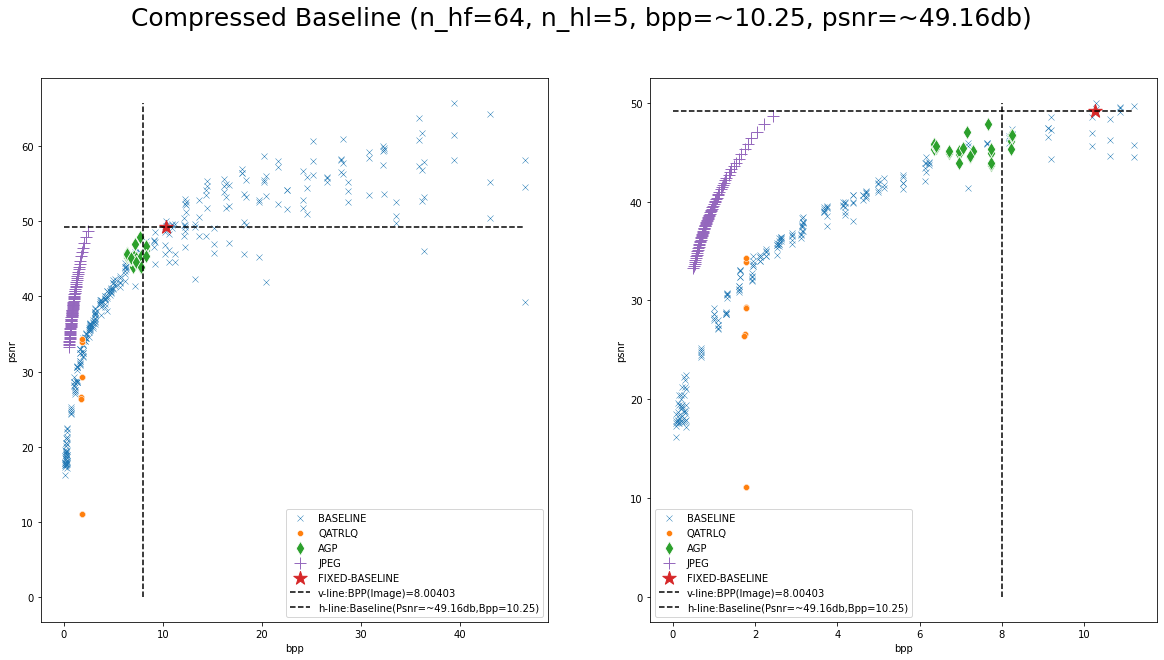

(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot:xlabel='bpp', ylabel='psnr'>,
        <AxesSubplot:xlabel='bpp', ylabel='psnr'>], dtype=object))

In [15]:
bpp_bsln, psnr_bsln = 10.25, 49.16
n_hf_bsln, n_hl_bsln = 64, 5
show_paired_graphics(cmprs_df, bpp_bsln, psnr_bsln, n_hf_bsln, n_hl_bsln, init_from = '2020.12.12-190415', savefig_flag=True)

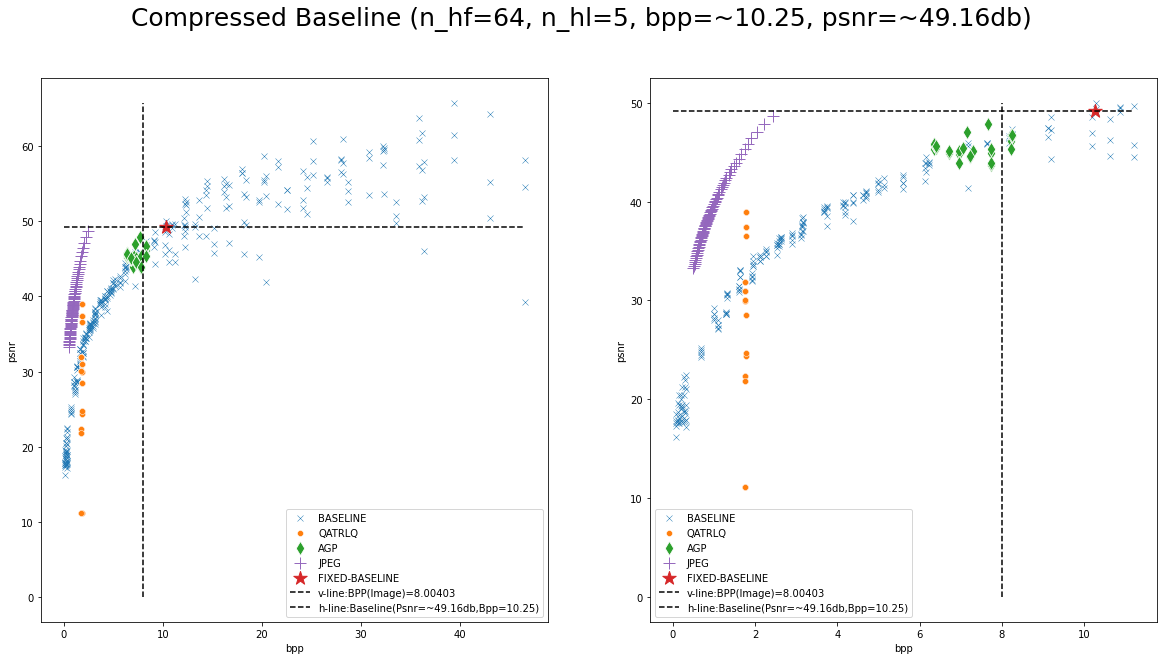

(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot:xlabel='bpp', ylabel='psnr'>,
        <AxesSubplot:xlabel='bpp', ylabel='psnr'>], dtype=object))

In [16]:
bpp_bsln, psnr_bsln = 10.25, 49.16
n_hf_bsln, n_hl_bsln = 64, 5
show_paired_graphics(cmprs_df, bpp_bsln, psnr_bsln, n_hf_bsln, n_hl_bsln, init_from = '2020.12.11-171610', savefig_flag=True)

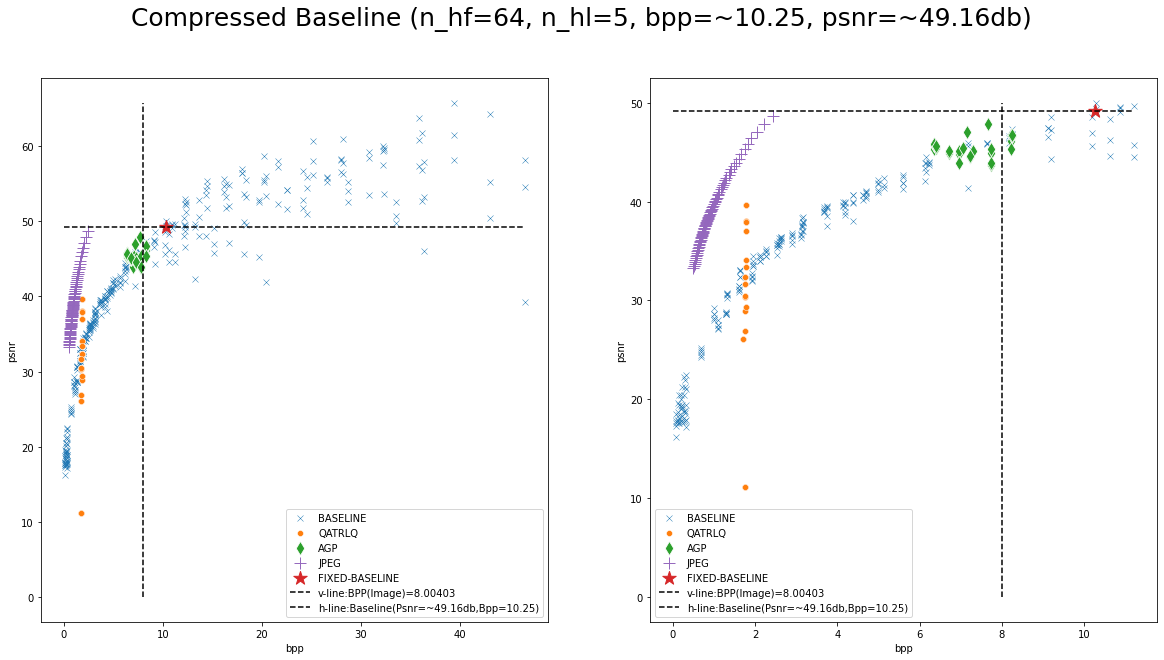

(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot:xlabel='bpp', ylabel='psnr'>,
        <AxesSubplot:xlabel='bpp', ylabel='psnr'>], dtype=object))

In [17]:
bpp_bsln, psnr_bsln = 10.25, 49.16
n_hf_bsln, n_hl_bsln = 64, 5
show_paired_graphics(cmprs_df, bpp_bsln, psnr_bsln, n_hf_bsln, n_hl_bsln, init_from = '2020.12.13-232457', savefig_flag=True)

In [18]:
baseline_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "Baseline".upper()) & (cmprs_df["psnr"] <= 50) & (cmprs_df["bpp"] <= 12)]
siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper())]
siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]

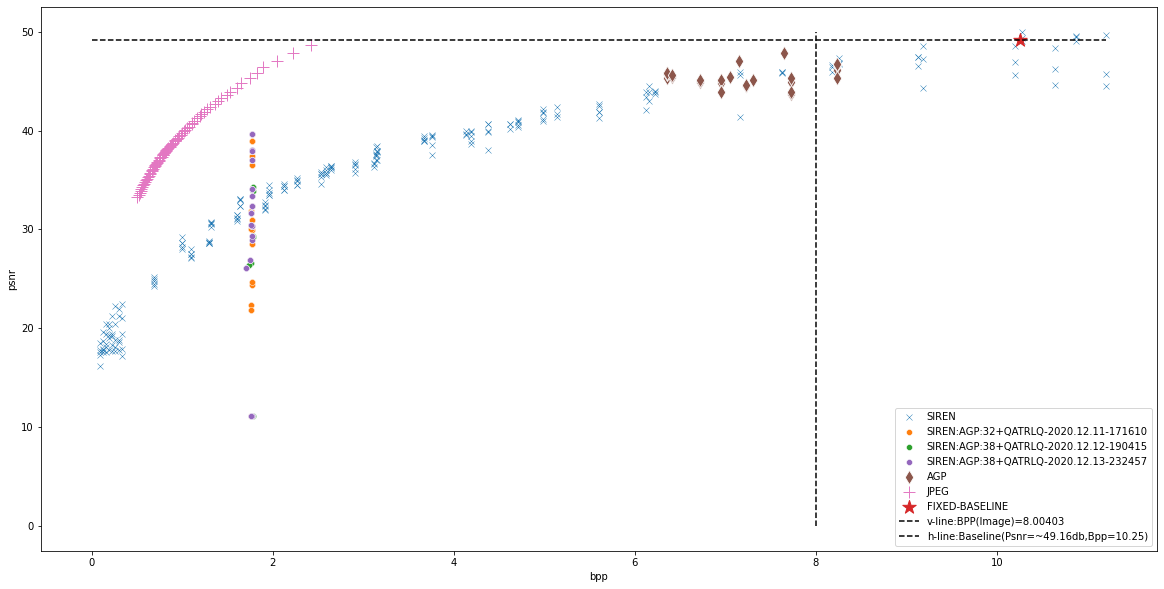

In [19]:
x = 'bpp'; y = "psnr"
fig, axes  = plt.subplots(1, 1, figsize = (20, 10))
colors = sns.color_palette()

# Baseline Data:
# -------------
sns.scatterplot(data = baseline_df, x=f"{x}", y=f"{y}",
            label = 'Siren'.upper(), marker = 'x', color = colors[0],
            ax = axes)
# Qatrlq Data:
# -------------
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.11-171610")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.11-171610")], x=f"{x}", y=f"{y}",
            # label = 'AGP:32+QATRLQ-2020.12.11-171610'.upper(), marker = 'o', color = colors[1],
            label = f'SIREN:AGP:{agp_rate:.0f}+QATRLQ-2020.12.11-171610'.upper(), marker = 'o', color = colors[1],
            ax = axes)
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.12-190415")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.12-190415")], x=f"{x}", y=f"{y}",
            # label = 'AGP:37.49+QATRLQ-2020.12.12-190415'.upper(), marker = 'o', color = colors[2],
            label = f'SIREN:AGP:{agp_rate:.0f}+QATRLQ-2020.12.12-190415'.upper(), marker = 'o', color = colors[2],
            ax = axes)
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.13-232457")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.13-232457")], x=f"{x}", y=f"{y}",
            label = f'SIREN:AGP:{agp_rate:.0f}+QATRLQ-2020.12.13-232457'.upper(), marker = 'o', color = colors[4],
            ax = axes)
# AGP Data:
# -------------
sns.scatterplot(data = siren_agp_df, x=f"{x}", y=f"{y}",
            label = 'Agp'.upper(), marker = 'd', s=100, color = colors[5],
            ax = axes)
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}",
            label = 'jpeg'.upper(), marker = '+', s=150, color = colors[6],
            ax = axes)
# Fixed Point Data:
# -------------
axes.scatter(bpp_bsln, psnr_bsln, label = 'fixed-baseline'.upper(), marker = '*', color = colors[3], s=200)

data = (baseline_df[y].values)
ymin, ymax = 0, np.max(data)
axes.vlines(x = 8.00403, ymin = ymin, ymax = ymax, 
       color='k', linestyle='--',
       label = 'v-line:BPP(Image)=8.00403')

data = (baseline_df[x].values)
xmin, xmax = 0, np.max(data)
axes.hlines(y = psnr_bsln, xmin = 0, xmax = xmax, 
       color='k', linestyle='--',
       label = f'h-line:Baseline(Psnr=~{psnr_bsln:.2f}db,Bpp={bpp_bsln:.2f})')


plt.legend()
plt.show()

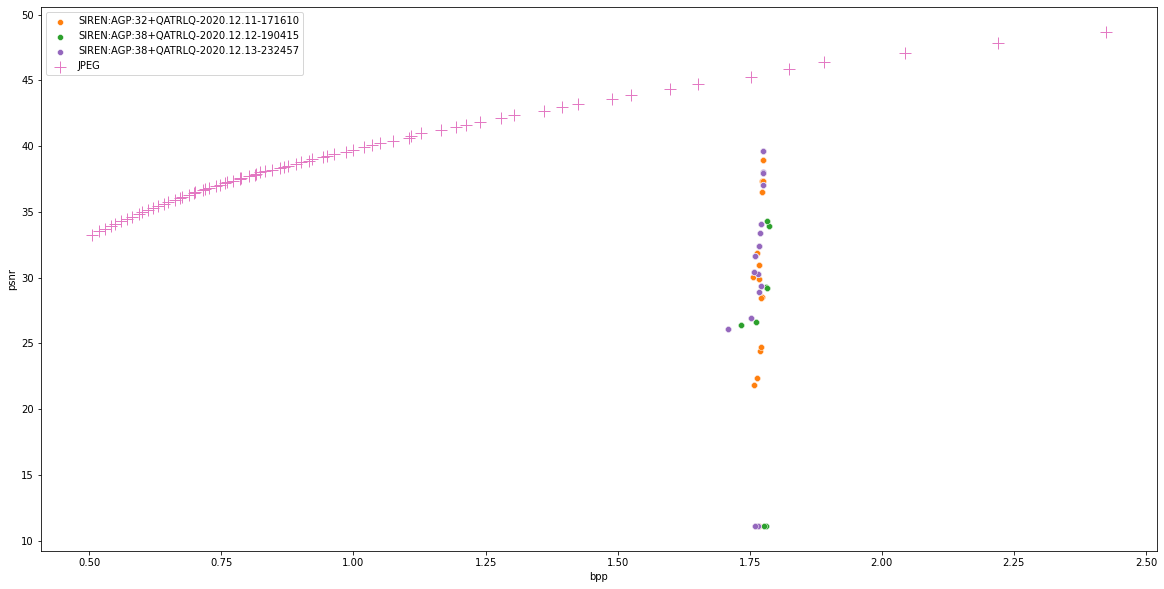

In [20]:
x = 'bpp'; y = "psnr"
fig, axes  = plt.subplots(1, 1, figsize = (20, 10))
colors = sns.color_palette()

# Baseline Data:
# -------------
# sns.scatterplot(data = baseline_df, x=f"{x}", y=f"{y}", label = 'Siren'.upper(), marker = 'x', color = colors[0], ax = axes)
# Qatrlq Data:
# -------------
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.11-171610")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.11-171610")], x=f"{x}", y=f"{y}",
            # label = 'AGP:32+QATRLQ-2020.12.11-171610'.upper(), marker = 'o', color = colors[1],
            label = f'SIREN:AGP:{agp_rate:.0f}+QATRLQ-2020.12.11-171610'.upper(), marker = 'o', color = colors[1],
            ax = axes)
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.12-190415")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.12-190415")], x=f"{x}", y=f"{y}",
            # label = 'AGP:37.49+QATRLQ-2020.12.12-190415'.upper(), marker = 'o', color = colors[2],
            label = f'SIREN:AGP:{agp_rate:.0f}+QATRLQ-2020.12.12-190415'.upper(), marker = 'o', color = colors[2],
            ax = axes)
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.13-232457")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.13-232457")], x=f"{x}", y=f"{y}",
            label = f'SIREN:AGP:{agp_rate:.0f}+QATRLQ-2020.12.13-232457'.upper(), marker = 'o', color = colors[4],
            ax = axes)
# AGP Data:
# -------------
# sns.scatterplot(data = siren_agp_df, x=f"{x}", y=f"{y}", label = 'Agp'.upper(), marker = 'd', s=100, color = colors[5], ax = axes)
# Jpeg Data:
# -------------
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg'.upper(), marker = '+', s=150, color = colors[6], ax = axes)
plt.legend()
plt.show()

### Get best QATRLQ for each Agp Pruned model

In [21]:
list_df = []
for gp_name, gp_data in siren_qatrlq_df.groupby(by = ['init-from']):
    psnr_max = max(gp_data["psnr"].values)
    first_row_max_psnr = gp_data[gp_data["psnr"] == psnr_max].iloc[0,:]
    list_df.append(first_row_max_psnr)
    pass
siren_qatrlq_best_df = pd.DataFrame(list_df)
siren_qatrlq_best_df.head(5).style.hide_index()

date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
2021.01.11-183952,2020.12.11-171610,14536.000000,17.308883,38.955177,1.774414,4.508531,0.000509,0.969269,AGP+QATRLQ:S:PCW,QATRLQ
2021.01.10-230632,2020.12.12-190415,14602.000000,17.387473,34.315303,1.782471,4.488152,0.001484,0.921473,AGP+QATRLQ:S:NNPCW,QATRLQ
2021.01.12-014045,2020.12.13-232457,14547.000000,17.321981,39.641515,1.775757,4.505121,0.000435,0.971622,AGP+QATRLQ:S:PCW,QATRLQ
2021.01.12-222940,2020.12.14-174343,16489.000000,19.634437,39.044617,2.012817,3.974528,0.000499,0.970982,AGP+QATRLQ:S:PCW,QATRLQ


In [22]:
list_df = []
for gp_name, gp_data in siren_agp_df.groupby(by = ['date']):
    psnr_max = max(gp_data["psnr"].values)
    first_row_max_psnr = gp_data[gp_data["psnr"] == psnr_max].iloc[0,:]
    list_df.append(first_row_max_psnr)
    pass
pd.DataFrame(list_df).style.hide_index()

date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
2020.12.07-045630,2020.11.29-231149,57780.000000,68.802096,45.418737,7.053223,0.549498,0.000115,0.990626,AGP:31,AGP
2020.12.08-191157,2020.11.29-231149,56952.000000,67.816147,45.153248,6.952148,0.557487,0.000122,0.990075,AGP:32,AGP
2020.12.09-085652,2020.11.29-231149,56952.000000,67.816147,44.789306,6.952148,0.557487,0.000133,0.990357,AGP:32,AGP
2020.12.10-044629,2020.11.29-231149,52040.000000,61.967135,45.815071,6.352539,0.610108,0.000105,0.989299,AGP:38,AGP
2020.12.11-171610,2020.11.29-231149,56956.000000,67.820910,43.930189,6.952637,0.557448,0.000162,0.989889,AGP:32,AGP
2020.12.12-190415,2020.11.29-231149,52044.000000,61.971898,45.704250,6.353027,0.610061,0.000108,0.989044,AGP:38,AGP
2020.12.13-232457,2020.11.29-231149,67432.000000,80.295308,46.130210,8.231445,0.470845,0.000097,0.991397,AGP:19,AGP
2020.12.14-102807,2020.11.29-231149,52492.000000,62.505358,45.615160,6.407715,0.604854,0.000110,0.988598,AGP:37,AGP
2020.12.14-174343,2020.11.29-231149,58592.000000,69.768993,46.983461,7.152344,0.541883,0.000080,0.991448,AGP:30,AGP
2020.12.15-173411,2020.11.29-231149,62688.000000,74.646344,47.872620,7.652344,0.506477,0.000065,0.992671,AGP:25,AGP


In [23]:
psnr_max = max(siren_agp_df["psnr"].values)
first_row_max_psnr = siren_agp_df[siren_agp_df["psnr"] == psnr_max].iloc[0,:]
siren_agp_best_df = pd.DataFrame([first_row_max_psnr])
siren_agp_best_df.head(5).style.hide_index()

date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
2020.12.15-173411,2020.11.29-231149,62688.000000,74.646344,47.872620,7.652344,0.506477,0.000065,0.992671,AGP:25,AGP


### Get best Agp Pruned models

In [24]:
siren_agp_baselines = []
for target_date in "2020.12.11-171610,2020.12.12-190415,2020.12.13-232457".split(","):
    tmp_df = siren_agp_df[(siren_agp_df["date"] == target_date)]
    tmp_df = tmp_df[(tmp_df["footprint(%)"] == tmp_df["footprint(%)"].min())]
    siren_agp_baselines.append(tmp_df)
    pass
siren_agp_baselines = pd.concat(siren_agp_baselines, axis = 0)
siren_agp_baselines.head(5).style.hide_index()

date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
2020.12.11-171610,2020.11.29-231149,56956.000000,67.820910,43.930189,6.952637,0.557448,0.000162,0.989889,AGP:32,AGP
2020.12.12-190415,2020.11.29-231149,52044.000000,61.971898,45.704250,6.353027,0.610061,0.000108,0.989044,AGP:38,AGP
2020.12.13-232457,2020.11.29-231149,52036.000000,61.962372,45.786802,6.352051,0.610155,0.000106,0.989081,AGP:38,AGP


### Merge data for visualization purposes

In [25]:
# show_columns = "size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2".split(",")
# pd.concat([siren_agp_best_df, siren_qatrlq_best_df], axis = 0)[show_columns].head(5).style.hide_index()
table_df = pd.concat([baseline_data_df, siren_agp_best_df, siren_agp_baselines.iloc[0:,:], siren_qatrlq_best_df], axis = 0)

In [26]:
show_columns = "cmprss-class,size(byte),footprint(%),psnr,bpp,CR,mse,ssim".split(",")
table_df[show_columns].style.hide_index()

cmprss-class,size(byte),footprint(%),psnr,bpp,CR,mse,ssim
Baseline-n_hf64-n_hl5,83980.000000,100.000000,49.160000,10.251465,0.780376,0.000049,0.996000
AGP:25,62688.000000,74.646344,47.872620,7.652344,0.506477,0.000065,0.992671
AGP:32,56956.000000,67.820910,43.930189,6.952637,0.557448,0.000162,0.989889
AGP:38,52044.000000,61.971898,45.704250,6.353027,0.610061,0.000108,0.989044
AGP:38,52036.000000,61.962372,45.786802,6.352051,0.610155,0.000106,0.989081
AGP+QATRLQ:S:PCW,14536.000000,17.308883,38.955177,1.774414,4.508531,0.000509,0.969269
AGP+QATRLQ:S:NNPCW,14602.000000,17.387473,34.315303,1.782471,4.488152,0.001484,0.921473
AGP+QATRLQ:S:PCW,14547.000000,17.321981,39.641515,1.775757,4.505121,0.000435,0.971622
AGP+QATRLQ:S:PCW,16489.000000,19.634437,39.044617,2.012817,3.974528,0.000499,0.970982


In [27]:
table_df = pd.concat([baseline_data_df, siren_agp_baselines.iloc[0:2,:], siren_qatrlq_best_df], axis = 0)
show_columns = "cmprss-class,size(byte),footprint(%),psnr,bpp,CR,mse,ssim".split(",")
show_columns = "cmprss-class,size(byte),footprint(%),psnr,drop_psnr,drop_psnr(%),bpp,drop_bpp,drop_bpp(%),CR".split(",")

table_df['drop_psnr'] = table_df['psnr'].values - table_df['psnr'].values[0]
table_df['drop_psnr(%)'] = (table_df['drop_psnr'].values * (-1) / table_df['psnr'].values[0]) * 100
table_df['drop_psnr(%)'][0] = 0.0

table_df['drop_bpp'] = table_df['bpp'].values - table_df['bpp'].values[0]
table_df['drop_bpp(%)'] = (table_df['drop_bpp'].values * (-1) / table_df['bpp'].values[0]) * 100
table_df['drop_bpp(%)'][0] = 0.0

table_df[show_columns].style.hide_index()

cmprss-class,size(byte),footprint(%),psnr,drop_psnr,drop_psnr(%),bpp,drop_bpp,drop_bpp(%),CR
Baseline-n_hf64-n_hl5,83980.000000,100.000000,49.160000,0.000000,0.000000,10.251465,0.000000,0.000000,0.780376
AGP:32,56956.000000,67.820910,43.930189,-5.229811,10.638346,6.952637,-3.298828,32.179090,0.557448
AGP:38,52044.000000,61.971898,45.704250,-3.455750,7.029598,6.353027,-3.898437,38.028102,0.610061
AGP+QATRLQ:S:PCW,14536.000000,17.308883,38.955177,-10.204823,20.758387,1.774414,-8.477051,82.691117,4.508531
AGP+QATRLQ:S:NNPCW,14602.000000,17.387473,34.315303,-14.844697,30.196699,1.782471,-8.468994,82.612527,4.488152
AGP+QATRLQ:S:PCW,14547.000000,17.321981,39.641515,-9.518485,19.362257,1.775757,-8.475708,82.678019,4.505121
AGP+QATRLQ:S:PCW,16489.000000,19.634437,39.044617,-10.115383,20.576451,2.012817,-8.238647,80.365563,3.974528


In [28]:
show_columns = "cmprss-class,size(byte),footprint(%),psnr,bpp,CR".split(",")
table_df[show_columns].style.hide_index()

cmprss-class,size(byte),footprint(%),psnr,bpp,CR
Baseline-n_hf64-n_hl5,83980.000000,100.000000,49.160000,10.251465,0.780376
AGP:32,56956.000000,67.820910,43.930189,6.952637,0.557448
AGP:38,52044.000000,61.971898,45.704250,6.353027,0.610061
AGP+QATRLQ:S:PCW,14536.000000,17.308883,38.955177,1.774414,4.508531
AGP+QATRLQ:S:NNPCW,14602.000000,17.387473,34.315303,1.782471,4.488152
AGP+QATRLQ:S:PCW,14547.000000,17.321981,39.641515,1.775757,4.505121
AGP+QATRLQ:S:PCW,16489.000000,19.634437,39.044617,2.012817,3.974528


### Get best Jpeg runs

In [29]:
best_nth_jpge_df = jpeg_df.tail(3)
best_nth_jpge_df

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
398,-,-,16741.0,19.934508,47.078218,2.043579,1.896541,1.274261,0.994504,JPEG:93,JPEG
399,-,-,18181.0,21.649202,47.827533,2.219360,1.746329,1.072327,0.995091,JPEG:94,JPEG
400,-,-,19863.0,23.652060,48.693716,2.424683,1.598449,0.878433,0.995725,JPEG:95,JPEG


In [30]:
tmp_jpeg_df = jpeg_df[jpeg_df["psnr"] <= max(siren_qatrlq_best_df["psnr"].values)]
best_jpeg_equal_lower_qat_data = tmp_jpeg_df.sort_values(by = ["psnr"], ascending = False).iloc[0,:]
best_jpeg_equal_lower_qat_data = pd.DataFrame([best_jpeg_equal_lower_qat_data.values], columns = best_jpeg_equal_lower_qat_data.index)
best_jpeg_equal_lower_qat_data

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,-,-,8083.0,9.624911,39.587219,0.986694,3.927997,7.150864,0.980026,JPEG:68,JPEG


In [31]:
# list_dfs = [baseline_data_df, siren_agp_baselines.iloc[0:,:], siren_qatrlq_best_df, best_nth_jpge_df.sort_values(by=["psnr"], ascending=False), best_jpeg_equal_lower_qat_data]
list_dfs = [baseline_data_df,
            siren_agp_baselines.iloc[0:,:],
            siren_qatrlq_best_df,
            best_nth_jpge_df.sort_values(by=["psnr"], ascending=False),
            best_jpeg_equal_lower_qat_data,
           ]
table_df = pd.concat(list_dfs, axis = 0, ignore_index = True)

show_columns = "date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,mse,ssim".split(",")
show_columns = "date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,ssim,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(",")

table_df['delta_psnr'] = table_df['psnr'].values - table_df['psnr'].values[0]
table_df['delta_psnr(%)'] = (table_df['delta_psnr'].values * (-1) / table_df['psnr'].values[0]) * 100
table_df['delta_psnr(%)'][0] = 0.0

table_df['delta_bpp'] = table_df['bpp'].values - table_df['bpp'].values[0]
table_df['delta_bpp(%)'] = (table_df['delta_bpp'].values * (-1) / table_df['bpp'].values[0]) * 100
table_df['delta_bpp(%)'][0] = 0.0

formatter_dict = {'size(byte)': "{:.0f}",'ssim':'{:.3e}'}
keys = "footprint(%),psnr,bpp,CR,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(",")
for a_key in keys:
    formatter_dict[a_key] = '{:.2f}'
table_df[show_columns]\
    .style\
    .format(formatter_dict)\
    .background_gradient(cmap='viridis').hide_index() # .highlight_max().highlight_min()
# .background_gradient(cmap='viridis')

date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,ssim,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)
2020.11.29-231149,-,Baseline-n_hf64-n_hl5,83980,100.00,49.16,10.25,0.78,9.960e-01,0.00,0.00,0.00,0.00
2020.12.11-171610,2020.11.29-231149,AGP:32,56956,67.82,43.93,6.95,0.56,9.899e-01,-5.23,10.64,-3.30,32.18
2020.12.12-190415,2020.11.29-231149,AGP:38,52044,61.97,45.70,6.35,0.61,9.890e-01,-3.46,7.03,-3.90,38.03
2020.12.13-232457,2020.11.29-231149,AGP:38,52036,61.96,45.79,6.35,0.61,9.891e-01,-3.37,6.86,-3.90,38.04
2021.01.11-183952,2020.12.11-171610,AGP+QATRLQ:S:PCW,14536,17.31,38.96,1.77,4.51,9.693e-01,-10.20,20.76,-8.48,82.69
2021.01.10-230632,2020.12.12-190415,AGP+QATRLQ:S:NNPCW,14602,17.39,34.32,1.78,4.49,9.215e-01,-14.84,30.20,-8.47,82.61
2021.01.12-014045,2020.12.13-232457,AGP+QATRLQ:S:PCW,14547,17.32,39.64,1.78,4.51,9.716e-01,-9.52,19.36,-8.48,82.68
2021.01.12-222940,2020.12.14-174343,AGP+QATRLQ:S:PCW,16489,19.63,39.04,2.01,3.97,9.710e-01,-10.12,20.58,-8.24,80.37
-,-,JPEG:95,19863,23.65,48.69,2.42,1.60,9.957e-01,-0.47,0.95,-7.83,76.35
-,-,JPEG:94,18181,21.65,47.83,2.22,1.75,9.951e-01,-1.33,2.71,-8.03,78.35


In [32]:
attributes_of_groupby = ["cmprss-class"]
siren_qatrlq_df.groupby(by = attributes_of_groupby).describe().T\
.loc[[# ( 'MSE', 'mean'), ('MSE', 'std'), \
      ('psnr', 'mean'), ('psnr', 'std'), \
      # ('bpp', 'mean'), ('bpp', 'std'), \
      # ('model_size_byte', 'mean'), ('model_size_byte', 'std'), \
      ('bpp', 'mean'), ('bpp', 'std'), \
      ('ssim', 'mean'), ('ssim', 'std')
     ]]#.style.background_gradient(cmap='viridis',axis=0)

cmprss-class  AGP+QATRLQ:AS:NNPCW  AGP+QATRLQ:AS:PCW  AGP+QATRLQ:AU:NNPCW  \
psnr mean               29.006420          30.446588            30.009330   
     std                 8.063509           7.879112             7.526279   
bpp  mean                1.791570           1.800491             1.794369   
     std                 0.082114           0.079866             0.081267   
ssim mean                0.774942           0.805437             0.800066   
     std                 0.253191           0.230137             0.228470   

cmprss-class  AGP+QATRLQ:AU:PCW  AGP+QATRLQ:S:NNPCW  AGP+QATRLQ:S:PCW  
psnr mean             30.446588           30.009330         30.446588  
     std               7.879112            7.526279          7.879112  
bpp  mean              1.800491            1.794369          1.800491  
     std               0.079866            0.081267          0.079866  
ssim mean              0.805437            0.800066          0.805437  
     std               0.230137            0.228470          0.230137

In [33]:
attributes_of_groupby = ["cmprss-class"]
siren_agp_df.groupby(by = attributes_of_groupby).describe().T\
.loc[[# ( 'MSE', 'mean'), ('MSE', 'std'), \
      ('psnr', 'mean'), ('psnr', 'std'), \
      # ('bpp', 'mean'), ('bpp', 'std'), \
      # ('model_size_byte', 'mean'), ('model_size_byte', 'std'), \
      ('bpp', 'mean'), ('bpp', 'std'), \
      ('ssim', 'mean'), ('ssim', 'std')
     ]]#.style.background_gradient(cmap='viridis',axis=0)

cmprss-class     AGP:19     AGP:24     AGP:25     AGP:28     AGP:29  \
psnr mean     46.295319  44.471651  47.872620  45.073816  44.524792   
     std       0.586970   0.772463        NaN        NaN   0.100382   
bpp  mean      8.231543   7.726318   7.652344   7.303711   7.222656   
     std       0.001001   0.000935        NaN        NaN   0.000691   
ssim mean      0.793179   0.989573   0.992671   0.989893   0.988889   
     std       0.443401   0.000972        NaN        NaN   0.000182   

cmprss-class     AGP:30     AGP:31     AGP:32     AGP:34     AGP:37     AGP:38  
psnr mean     46.983461  45.418737  44.624248  45.018357  45.523818  45.647607  
     std            NaN        NaN   0.628014   0.127975   0.129178   0.246723  
bpp  mean      7.152344   7.053223   6.952311   6.717529   6.407715   6.352417  
     std            NaN        NaN   0.000282   0.000345   0.000000   0.000467  
ssim mean      0.991448   0.990626   0.990107   0.988413   0.988551   0.989035  
     std            NaN        NaN   0.000235   0.000098   0.000067   0.000241

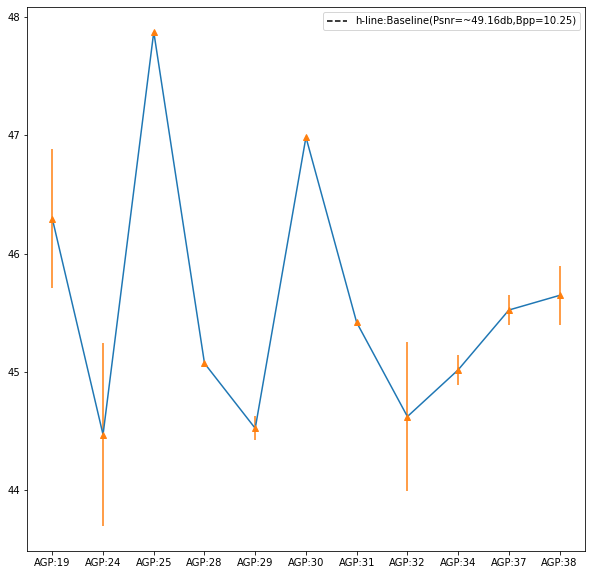

In [34]:
attributes_of_groupby = ["cmprss-class"]
tmp_df = siren_agp_df.groupby(by = attributes_of_groupby).describe().T.loc[[('psnr', 'mean'), ('psnr', 'std'),]]
tmp_df.columns

values = list(tmp_df.loc[('psnr', 'mean'),:])
e = list(tmp_df.loc[('psnr', 'std'),:])

fig = plt.figure(figsize=(10, 10))
plt.plot(values)
# plt.errorbar(range(len(values)), values, e, linestyle='None', marker='^')
plt.hlines(y = psnr_bsln, xmin = 0, xmax = len(values),  
           color='k', linestyle='--',
           label = f'h-line:Baseline(Psnr=~{psnr_bsln:.2f}db,Bpp={bpp_bsln:.2f})')
plt.errorbar(tmp_df.columns, values, e, linestyle='None', marker='^')
plt.legend()
plt.show()

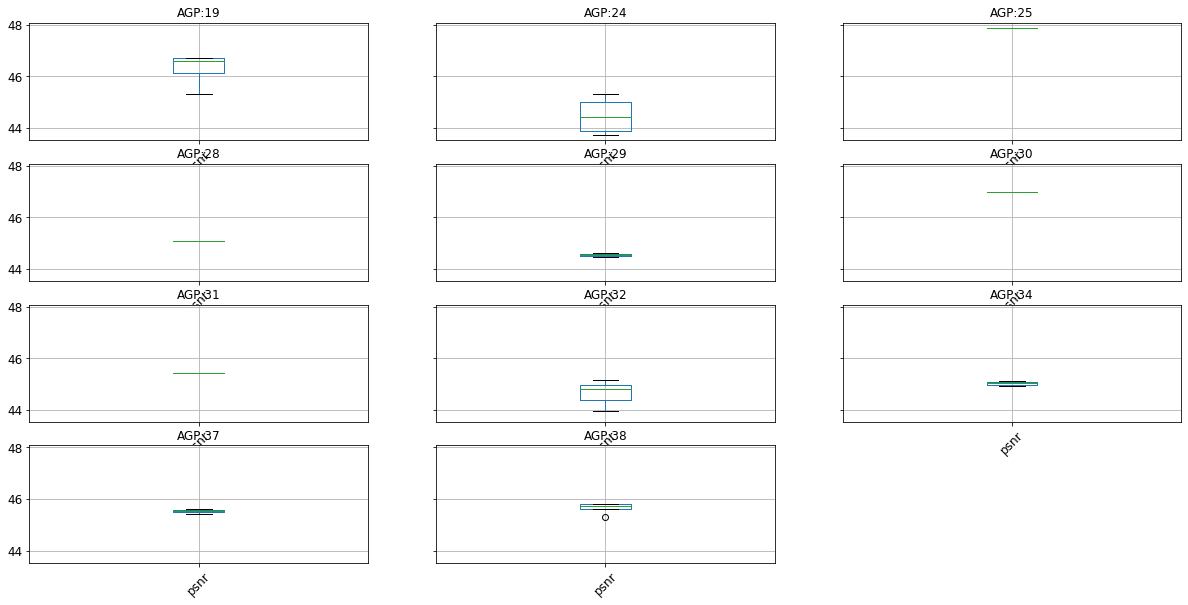

In [35]:
 _ = siren_agp_df[["cmprss-class", "psnr"]].groupby(by = attributes_of_groupby).boxplot(rot=45, fontsize=12, figsize=(20,10))

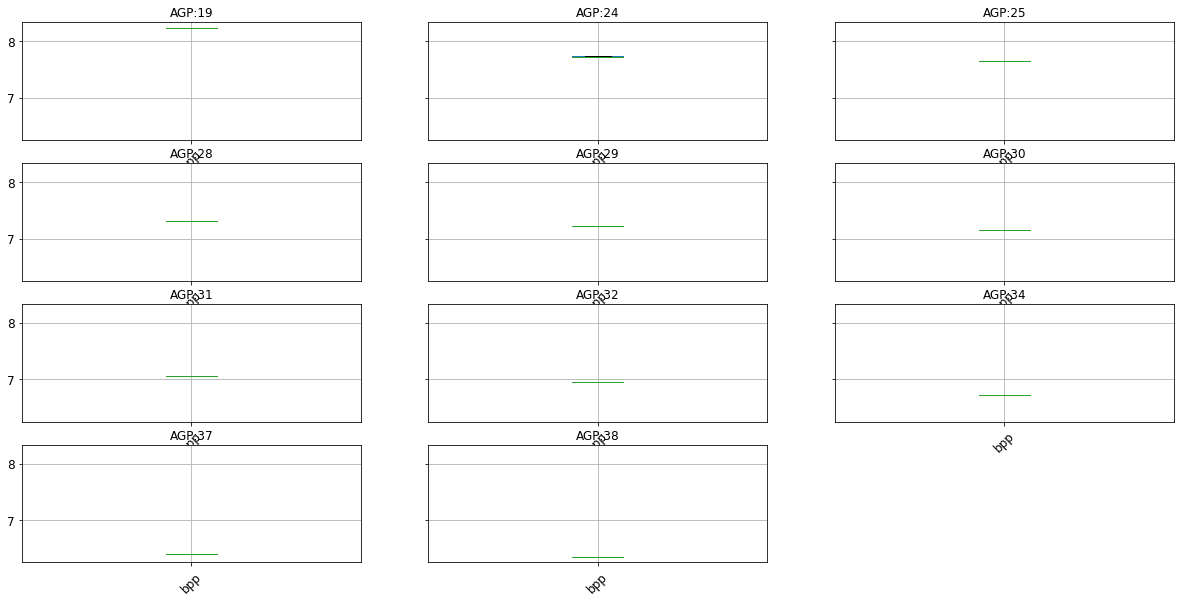

In [36]:
_ = siren_agp_df[["cmprss-class", "bpp"]].groupby(by = attributes_of_groupby).boxplot(rot=45, fontsize=12, figsize=(20,10))

## References
- [Styling Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [37]:
baseline_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "Baseline".upper()) & (cmprs_df["psnr"] <= 50) & (cmprs_df["bpp"] <= 12)]
siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper())]
siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]

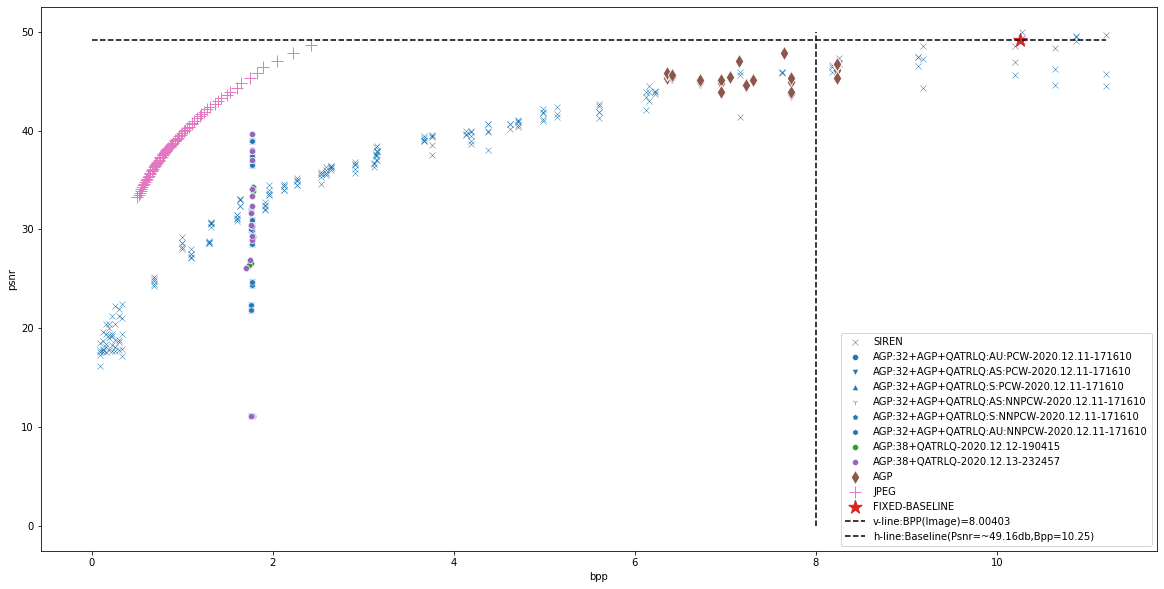

In [38]:
x = 'bpp'; y = "psnr"
fig, axes  = plt.subplots(1, 1, figsize = (20, 10))
colors = sns.color_palette()

# Baseline Data:
# -------------
sns.scatterplot(data = baseline_df, x=f"{x}", y=f"{y}",
            label = 'Siren'.upper(), marker = 'x', color = colors[0],
            ax = axes)
# Qatrlq Data:
# -------------
# qat_models_date
def plot_qatrl_data(target_date, color):
    markers = "o,v,^,1,p,h".split(",")
    agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == target_date)].iloc[0,:]["footprint(%)"]
    data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == target_date)]
    for ii, qat_linear in enumerate(qat_models_date):
        if qat_linear not in set(data["cmprss-class"].values): continue
        data_s = data[data["cmprss-class"] == qat_linear]
        marker = markers[ii]
        sns.scatterplot(data = data, x=f"{x}", y=f"{y}",
            # label = 'AGP:32+QATRLQ-2020.12.11-171610'.upper(), marker = 'o', color = colors[1],
            label = f'AGP:{agp_rate:.0f}+{qat_linear}-2020.12.11-171610'.upper(), marker = marker, color = color,
            ax = axes)
    pass
target_date = "2020.12.11-171610"
color = colors[0]
plot_qatrl_data(target_date, color)

agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.12-190415")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.12-190415")], x=f"{x}", y=f"{y}",
            # label = 'AGP:37.49+QATRLQ-2020.12.12-190415'.upper(), marker = 'o', color = colors[2],
            label = f'AGP:{agp_rate:.0f}+QATRLQ-2020.12.12-190415'.upper(), marker = 'o', color = colors[2],
            ax = axes)
agp_rate = 100 - siren_agp_df[(siren_agp_df['date'] == "2020.12.13-232457")].iloc[0,:]["footprint(%)"]
sns.scatterplot(data = siren_qatrlq_df[(siren_qatrlq_df['init-from'] == "2020.12.13-232457")], x=f"{x}", y=f"{y}",
            label = f'AGP:{agp_rate:.0f}+QATRLQ-2020.12.13-232457'.upper(), marker = 'o', color = colors[4],
            ax = axes)
# AGP Data:
# -------------
sns.scatterplot(data = siren_agp_df, x=f"{x}", y=f"{y}",
            label = 'Agp'.upper(), marker = 'd', s=100, color = colors[5],
            ax = axes)
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}",
            label = 'jpeg'.upper(), marker = '+', s=150, color = colors[6],
            ax = axes)
# Fixed Point Data:
# -------------
axes.scatter(bpp_bsln, psnr_bsln, label = 'fixed-baseline'.upper(), marker = '*', color = colors[3], s=200)

data = (baseline_df[y].values)
ymin, ymax = 0, np.max(data)
axes.vlines(x = 8.00403, ymin = ymin, ymax = ymax, 
       color='k', linestyle='--',
       label = 'v-line:BPP(Image)=8.00403')

data = (baseline_df[x].values)
xmin, xmax = 0, np.max(data)
axes.hlines(y = psnr_bsln, xmin = 0, xmax = xmax, 
       color='k', linestyle='--',
       label = f'h-line:Baseline(Psnr=~{psnr_bsln:.2f}db,Bpp={bpp_bsln:.2f})')


plt.legend()
plt.show()